# Week 1. 원티드 국민연금 DB를 이용한 유니콘 기업 선별
## TEAM3. 김동섭 김태민 안태윤 이해강

**1. 프로젝트 개요   
&nbsp;1.1 프로젝트 목표       
&nbsp;1.2. 분석데이터**           

**2.EDA   
&nbsp;2.1. EDA목표   
&nbsp;2.2. EDA분석  
&nbsp;&nbsp;2.2.1. 데이터의 기본적인 내용 파악   
&nbsp;&nbsp;2.2.2. 각 피처의 데이터 특징 확인   
&nbsp;&nbsp;2.2.3. 실제 유니콘 기업의 정의   
&nbsp;&nbsp;2.2.4. 실제 유니콘 기업 데이터 특징 확인   
&nbsp;&nbsp;2.2.5. 유니콘 기업 선정 기준 정립 위한 EDA   
&nbsp;2.3. EDA결론 및 가설 수립   
&nbsp;&nbsp;2.3.1. EDA결론   
&nbsp;&nbsp;2.3.2. 가술 수립**  

**3. 수립한 가설바탕 데이터분석   
&nbsp;3.1. 2015-2019 직원수 평균   
&nbsp;3.2 2015-2019 1인당 임금 평균성장률   
&nbsp;3.3. 2015-2019 월평균 임금보험료 평균   
&nbsp;3.4. 2015-2019 연매출액 평균   
&nbsp;3.5. 2015-2019 연매출액 평균성장률   
&nbsp;3.6. 2015-2019 일인당매출액 평균성장률**

**4. 최종 결론   
&nbsp;4.1. 결론 도출 과정   
&nbsp;4.2. 최종 선정 6개 유니콘 기업**

## 1. 프로젝트 개요

### 1.1 프로젝트 목표

* **원티드 국민연금 데이터의 기업데이터를 활용해 유니콘 기업으로 보이거나 예상되는 기업들 선별**   

### 1.2. 분석데이터

* **company_nps_data.csv(원티드 국민연금 데이터)**   

## 2. EDA

### 2.1. EDA목표

**(1). 데이터들의 분포 (직원 수, 매출액, 보험료, +@)   
(2). 몇몇 회사를 선택하여 데이터 흐름 살펴보기   
(3). 데이터 사이의 관계에 대해 유의미한 결론을 찾아봅시다. (아이디어 수립 → EDA를 통해 관찰)**

### 2.2. EDA 분석

### 2.2.1. 데이터의 기본적인 내용 파악

### 요약 <br>
>* 연매출액 단위: 천 원    
>* 2015년~2019년 데이터   
>* 월별 데이터: 직원수, 국민연금 보험료(인원수에 대한 상한선 존재)   
>* 데이터 Shape : (99801, 6)   
>* 데이터 type   
>  * 회사ID (int64)   
>  * 연매출액 (int64)   
>  * 년도(int64)   
>  * 월(int64)   
>  * 월별_연금보험료(int64)    
>  * 월별_직원수(int64)   
>* 5000개 기업으로 구성된 데이터

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings('ignore')
import math

In [2]:
df = pd.read_csv('./company_nps_data.csv', encoding='cp949')
print(df.shape)
df.head()

(99801, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151


In [3]:
#기본정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99801 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99801 non-null  int64
 1   연매출액      99801 non-null  int64
 2   년도        99801 non-null  int64
 3   월         99801 non-null  int64
 4   월별_연금보험료  99801 non-null  int64
 5   월별_직원수    99801 non-null  int64
dtypes: int64(6)
memory usage: 4.6 MB


In [4]:
# 결측치 확인
df.isnull().sum().to_frame().T

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,0,0,0,0,0,0


* 모든 데이터는 int type
* 당장 눈에 보이는 null은 없음

In [5]:
df.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,99801.00,99801.00,99801.00,99801.00,99801.00,99801.00
mean,276298.17,30535893.43,2016.97,6.71,9734079.21,37.62
std,133903.15,301664669.02,0.98,3.51,43472560.17,146.95
min,63.00,-7882176.00,2015.00,1.00,0.00,0.00
25%,165530.00,1409760.00,2016.00,4.00,1181160.00,6.00
50%,259149.00,3573585.00,2017.00,7.00,2332760.00,11.00
75%,382656.00,9582321.00,2018.00,10.00,5591860.00,24.00
max,5159723.00,11328779396.00,2019.00,12.00,978067260.00,3133.00


* 월별 연금보험료와 월별 직원수가 0인 회사 존재
* 연매출액이 마이너스인 회사 존재
* 연매출액과 월별 연금보험료, 월별 직원수 모두 최댓값과 제3사분위수값의 차이가 큼

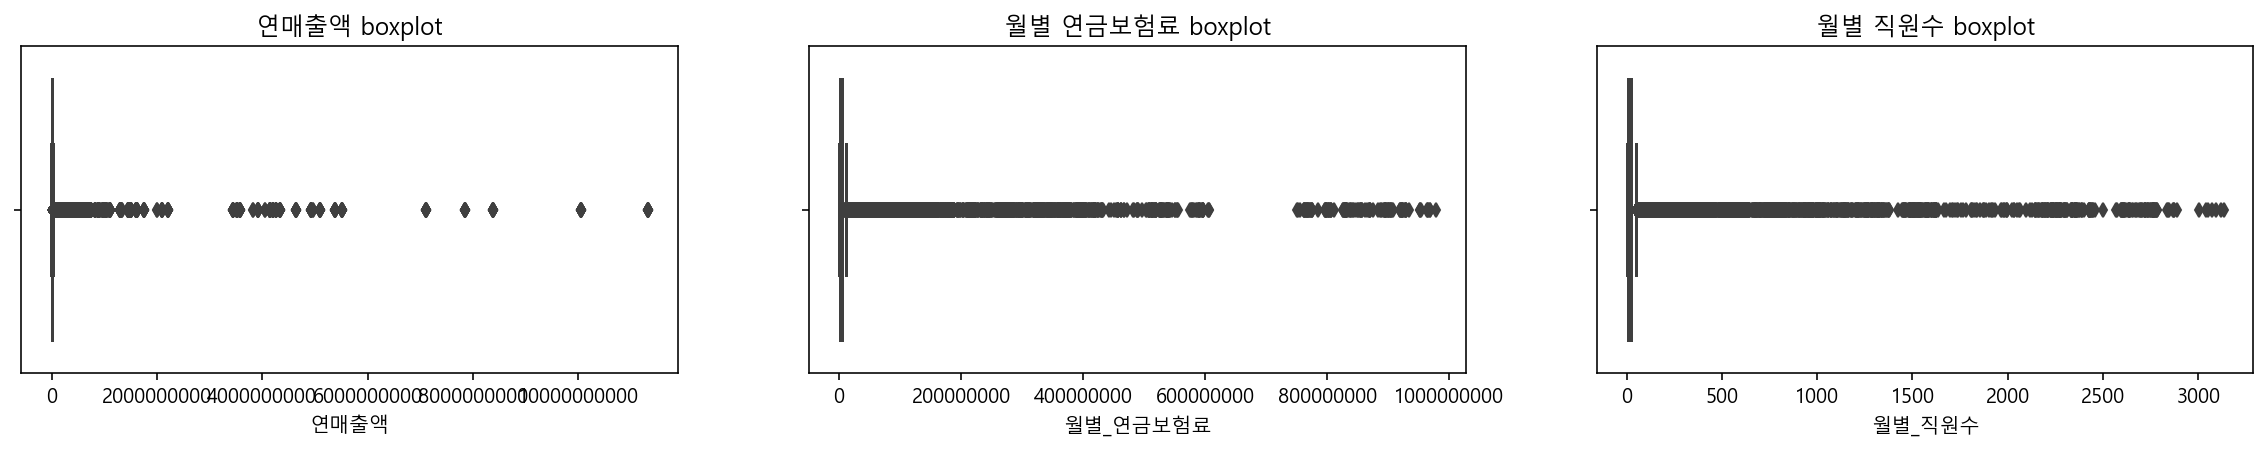

In [6]:
# 연매출액, 월별 연금보험료, 월별 직원수 Outlier 확인
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches([20, 3])

sns.boxplot(data=df, x='연매출액', ax=ax1)
sns.boxplot(data=df, x='월별_연금보험료', ax=ax2)
sns.boxplot(data=df, x='월별_직원수', ax=ax3)
ax1.set_title('연매출액 boxplot')
ax2.set_title('월별 연금보험료 boxplot')
ax3.set_title('월별 직원수 boxplot')
ax1.get_xaxis().get_major_formatter().set_scientific(False)
ax2.get_xaxis().get_major_formatter().set_scientific(False)
ax3.get_xaxis().get_major_formatter().set_scientific(False)

### 2.2.2. 각 피처의 데이터 특징 확인

### (1). 회사ID

In [7]:
df['회사ID'].nunique()

5000

* 5000개의 회사 존재

In [8]:
# 회사 분포
df_company=df['회사ID']
df_company.drop_duplicates(inplace=True)
df_company

0         233757
1         123464
2         342124
3         386420
4         129243
          ...   
96348     580794
96578    2256869
96888     547774
97566     413938
98769      96128
Name: 회사ID, Length: 5000, dtype: int64

### (2). 연매출액

In [9]:
print(df['연매출액'].min())
print(df['연매출액'].max())

-7882176
11328779396


* 연매출액 최솟값: 약 -78억 원 
* 연매출액 최댓값: 약 11조 원

In [10]:
# 연매출액 10조원 이상인 회사
df.loc[df['연매출액'] >= 10000000000].sort_values(by='회사ID')

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
53569,63,11328779396,2018,12,419953960,1014
80947,63,11328779396,2018,3,404826240,1013
80770,63,11328779396,2018,4,404211800,1012
79358,63,11328779396,2018,9,416186660,999
74251,63,11328779396,2018,2,406770960,1018
52606,63,11328779396,2018,8,418292620,1011
33039,63,11328779396,2018,1,403119840,1006
98243,63,11328779396,2018,11,414081820,995
23648,63,11328779396,2018,10,414503020,996
23302,63,11328779396,2018,7,418169080,1009


* 연매출액 10조원 이상 기업 : 2곳(63, 419945)
* 63회사는 2018년 데이터만, 419945회사는 2019년 데이터만 존재

In [11]:
# 연매출액의 성장률을 추출하기 위해 피벗테이블을 활용하여 '회사ID', '년도', '연매출액'만 추출
ndf = df.pivot_table('연매출액','회사ID','년도')
ndf.index = ndf.index.map(lambda x : str(x))
ndf.columns = ndf.columns.map(lambda x : str(x))
ndf

년도,2015,2016,2017,2018,2019
회사ID,,,,,
63,nan,nan,nan,11328779396.00,nan
95,nan,nan,nan,656947437.00,nan
102,nan,nan,nan,742658938.00,nan
295,nan,nan,nan,83776697.00,nan
414,nan,nan,nan,19732769.00,nan
...,...,...,...,...,...
2400284,nan,nan,nan,1263406.00,nan
2437574,nan,nan,nan,214016.00,nan
2693684,nan,nan,nan,nan,238076.00


* 회사ID별 연매출액 결측값이 많이 존재하는 것을 확인할 수 있음

Text(0.5, 1.0, '전체 회사 연매출액 추이')

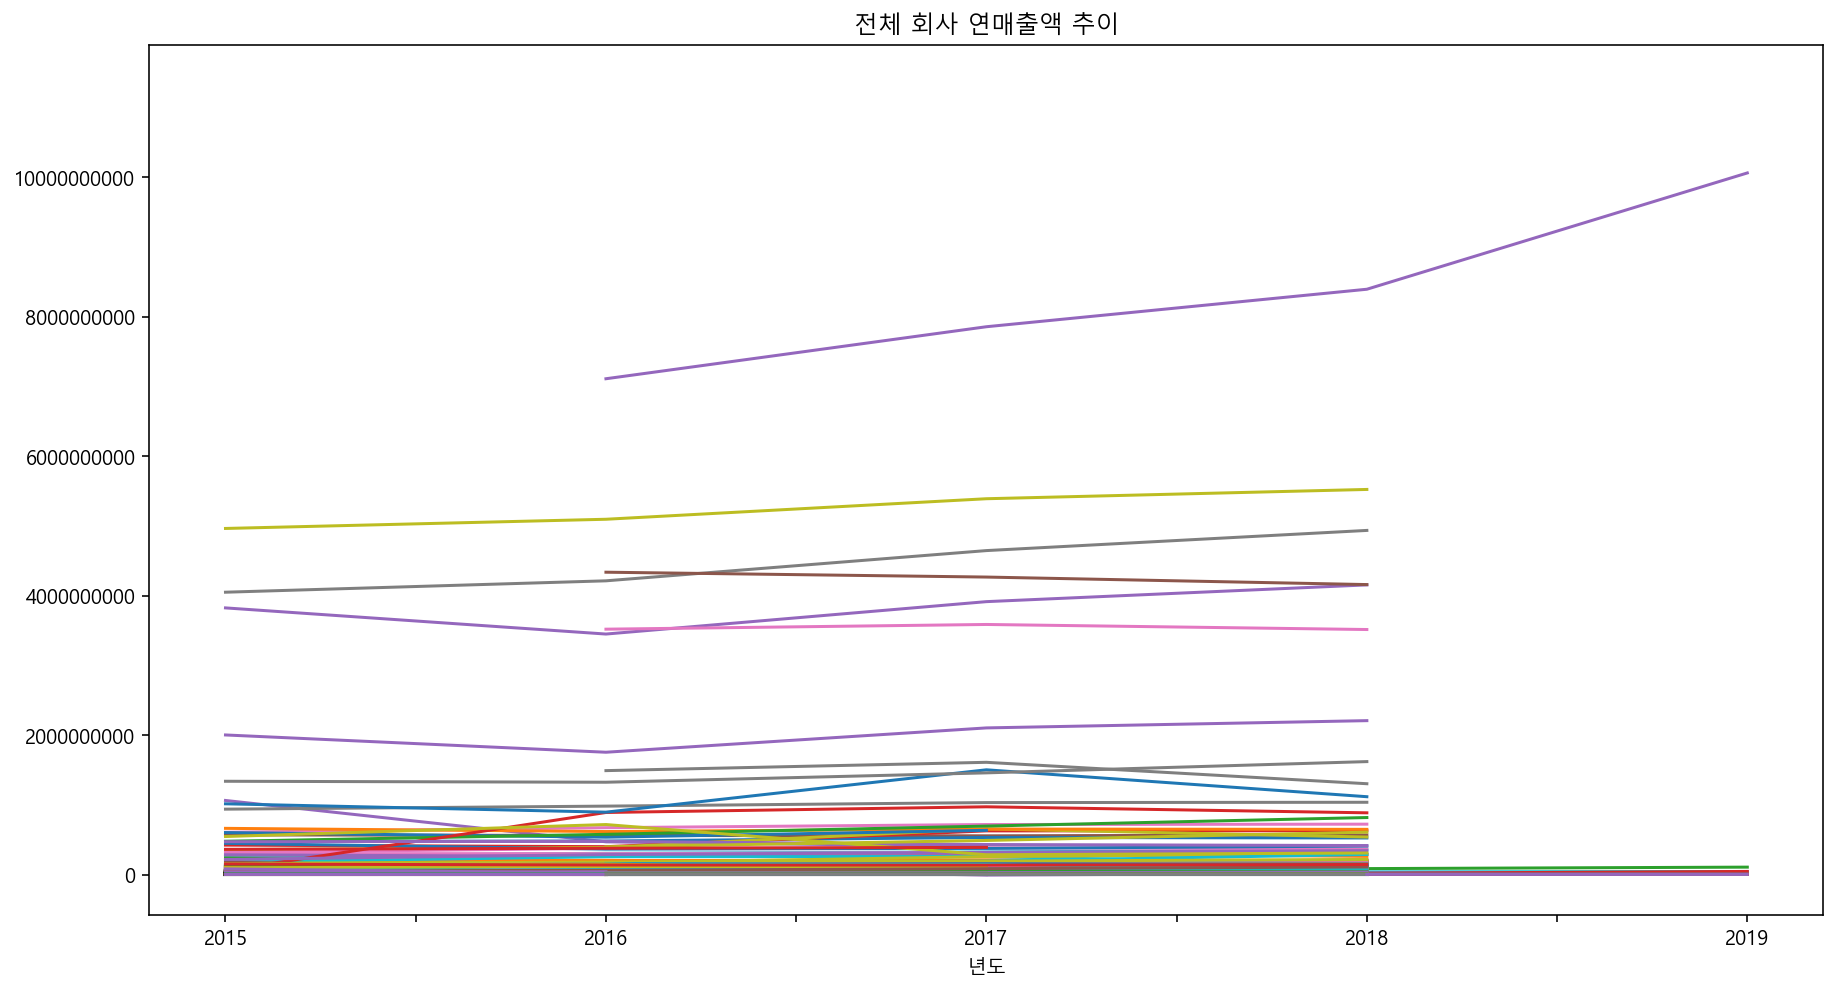

In [12]:
# 전체 회사별 연매출액 추이
ax = ndf.T.plot(figsize=(15,8),legend=False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('전체 회사 연매출액 추이')

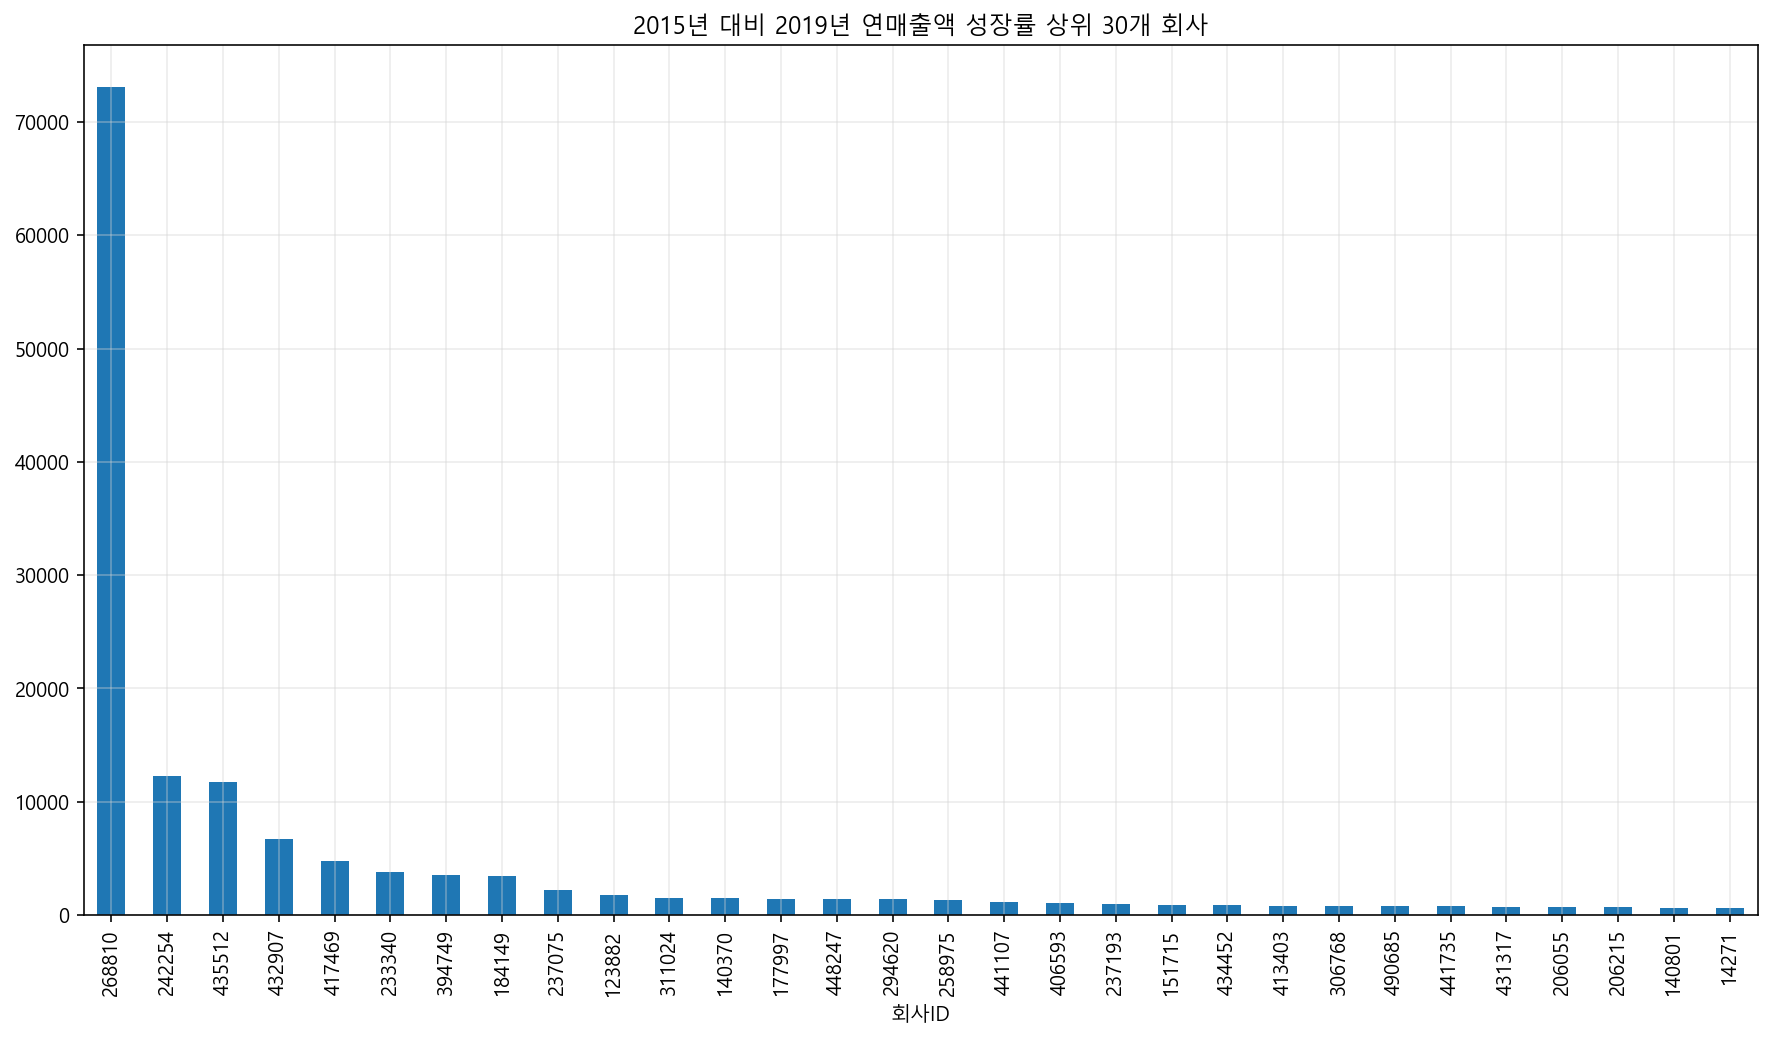

In [13]:
# 2015년 대비 2019년 회사별 연매출액이 얼마나 성장했는지를 나타내는 성장률 컬럼 생성
# 이를 위해 임시적으로 결측치를 앞뒤 방향의 값으로 채워줌
ndf.T.fillna(method = 'ffill',inplace=True)
ndf.T.fillna(method = 'bfill',inplace=True)

ndf1 = ndf[['2015','2019']]
ndf1['성장률'] = ((ndf1['2019']-ndf1['2015'])/ndf1['2015'])*100
ndf1['성장률'].sort_values(ascending=False).head(30).plot(kind='bar',figsize=(15,8))
plt.title('2015년 대비 2019년 연매출액 성장률 상위 30개 회사')
plt.grid(color='lightgrey', alpha=0.43)

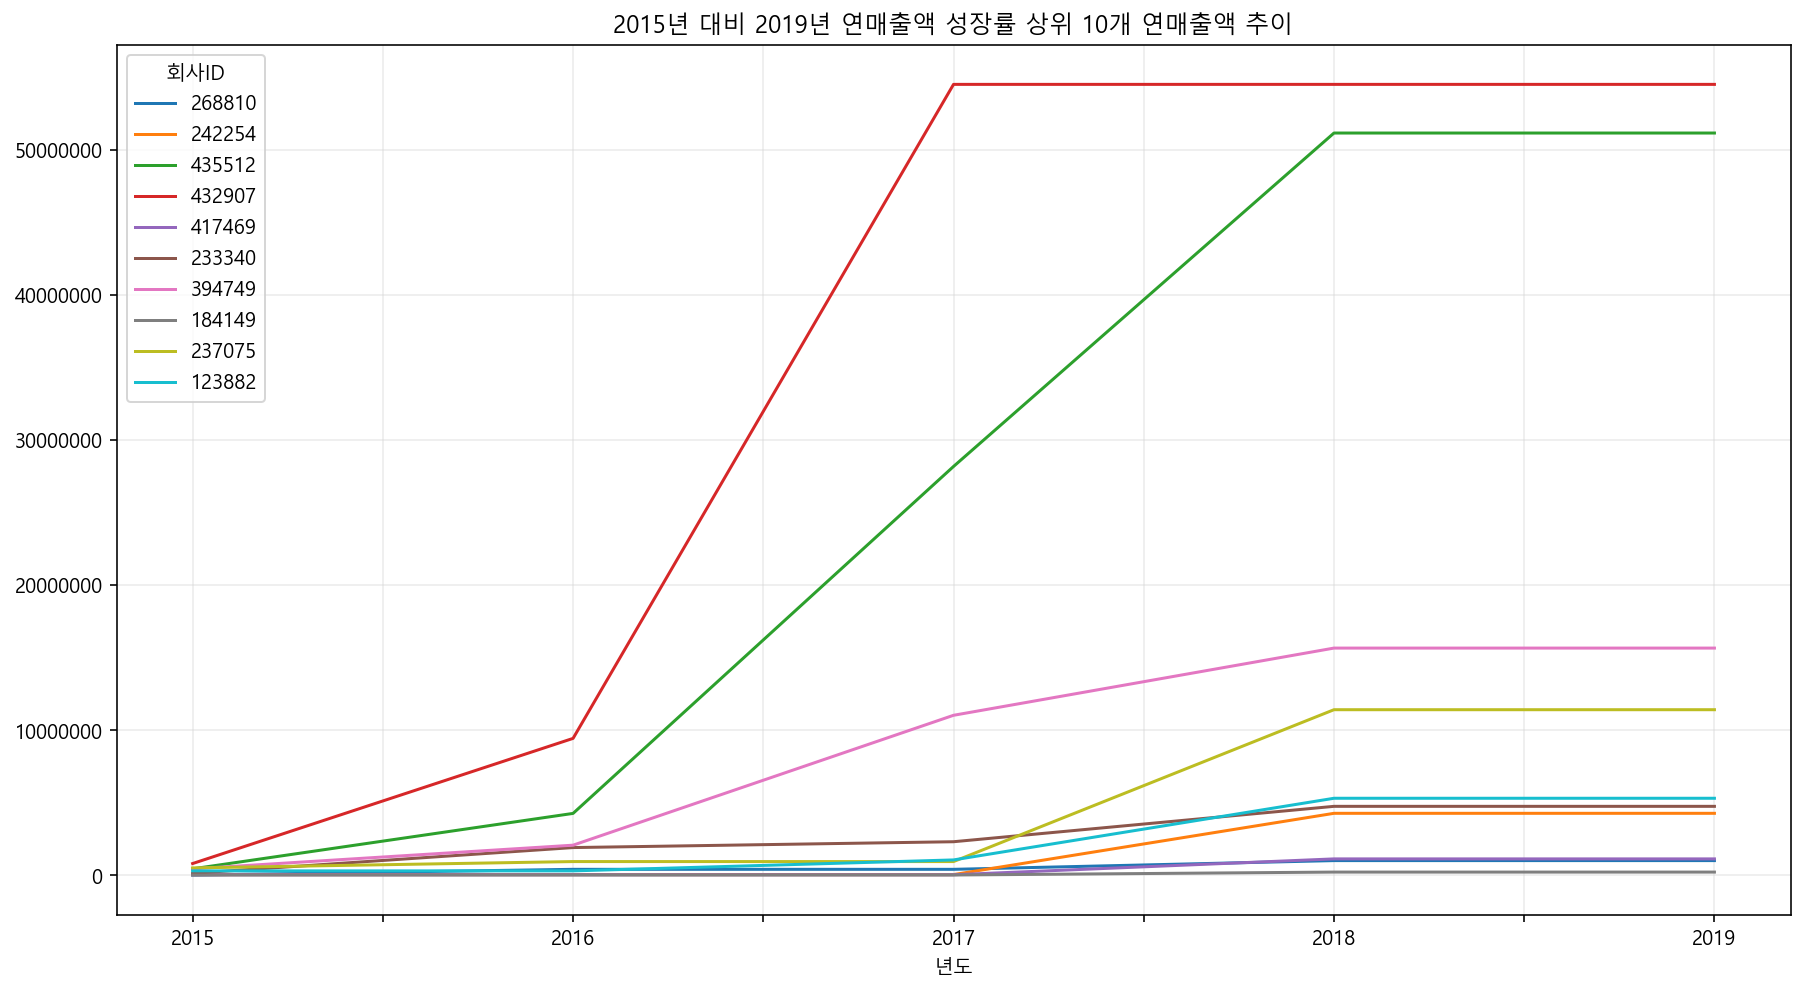

In [14]:
# 연매출액 성장률 상위 10개 회사 추이 그래프
n_ndf = ndf.loc[['268810','242254','435512','432907','417469','233340','394749','184149','237075','123882']]
ax = n_ndf.T.plot(figsize=(15,8))
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('2015년 대비 2019년 연매출액 성장률 상위 10개 연매출액 추이')
plt.grid(color='lightgrey', alpha=0.43)

* 2015년 대비 2019년 연매출액 성장률 상위 10개 기업 중 2019년 연매출이 100억 원 미만인 기업들 존재
* **유니콘 기업을 선정하기 위해 연매출액과 성장률의 최소 기준을 정해야 함**

### (3). 년도 & 월

In [15]:
data = df.copy()
data['Date'] = pd.to_datetime(data['년도'].astype(str) + data['월'].astype(str), format='%Y%m').dt.strftime('%Y/%m')
data.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,Date
0,233757,41688077,2018,7,8912380,36,2018/07
1,123464,1760695,2018,3,942380,5,2018/03
2,342124,3221341,2018,7,781180,4,2018/07
3,386420,4815584,2015,11,3795900,14,2015/11
4,129243,9799736,2018,10,40724680,151,2018/10


In [16]:
print(data['Date'].min())
print(data['Date'].max())

2015/11
2019/12


* 년도/월 : 2015년 11월~2019년 12월 

### (4). 월별 연금 보험료 & 월별 직원수

In [17]:
df.loc[df['월별_연금보험료'] == 0, '회사ID'].nunique()

11

* 월별 연금보험료가 0인 기업(중복은 1회로 count) : 11개

In [18]:
print(df.loc[df['월별_직원수'] == 0, '회사ID'].nunique())
print(df.loc[df['월별_직원수'] < 10, '회사ID'].nunique())

11
3178


* 월별 직원수가 0명인 기업(중복은 1회로 count): 11개
* 월별 직원수가 10명 미만인 기업(중복은 1회로 count): 3178개
* 유니콘 기업을 선정하기 위한 기준 필요

### (5). 연매출액 & 월별 연금 보험료 & 월별 직원수

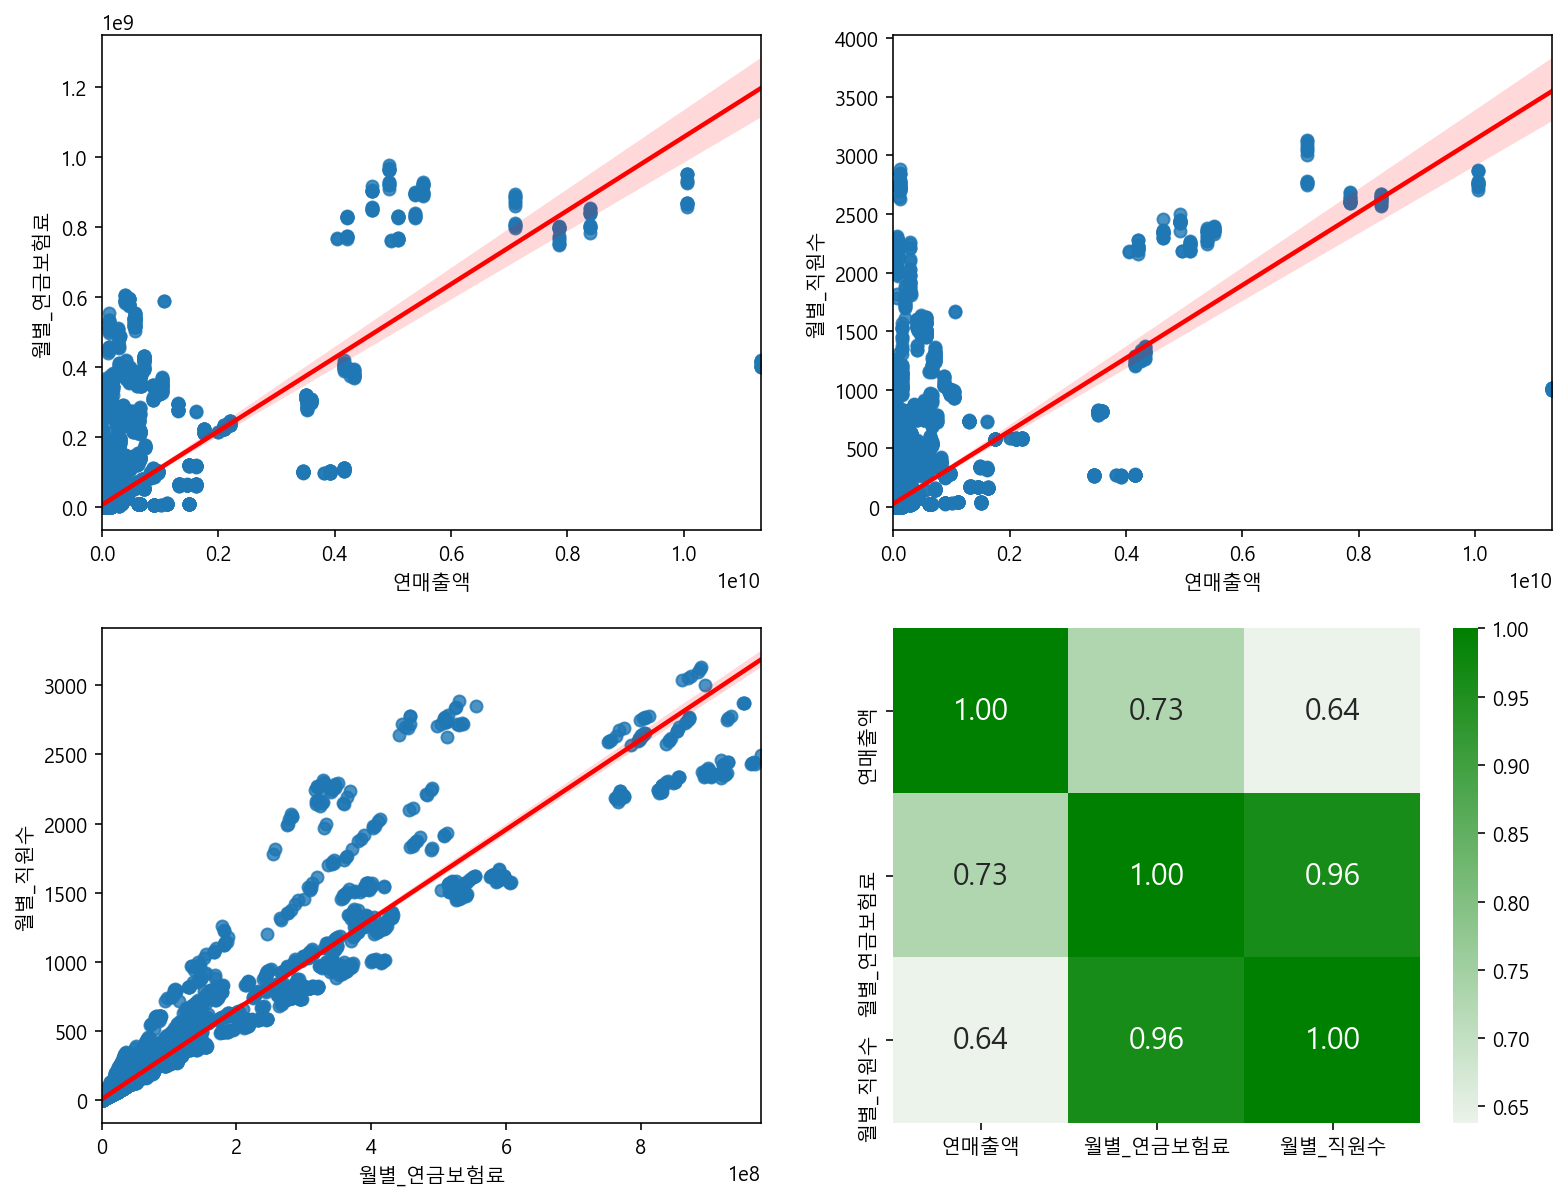

In [19]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
f.set_size_inches([13, 10])
sns.regplot(x="연매출액", y="월별_연금보험료", data=df, line_kws={'color':"red"}, ax=ax1)
sns.regplot(x="연매출액", y="월별_직원수", data=df, line_kws={'color':"red"}, ax=ax2)
sns.regplot(x="월별_연금보험료", y="월별_직원수", data=df, line_kws={'color':"red"}, ax=ax3)
cm = sns.light_palette('green', as_cmap=True) 
ax2 = sns.heatmap(data=df[['연매출액', '월별_연금보험료', '월별_직원수']].corr(),
                    annot=True,
                    fmt='.2f',
                    annot_kws={'size':15},
                    cmap=cm, ax=ax4)
# ax1.set_title('연매출액 & 월별 연금보험료')
# ax2.set_title('연매출액 & 월별 직원수')
# ax3.set_title('월별 연금보험료 & 월별 직원수')
# ax4.set_title('연매출액 & 월별 연금보험료 & 월별 직원수 상관관계 히트맵')

* 연매출액과 월별 연금보험료는 선형적 관계(강한 양의 상관관계: 0.73)
* 연매출액과 월별 직원수는 선형적 관계(양의 상관관계: 0.64)
* 월별 연금보험료와 월별 직원수는 선형적 관계(강한 양의 상관관계: 0.96)

### 2.2.3. 실제 유니콘 기업의 정의
#### 유니콘 기업: 기업 가치가 1조 원 이상이고 창업한 지 10년 이하인 비상장 스타트업 기업

* **주어진 데이터에선 기업가치와 직접적으로 연관된 칼럼을 찾기 힘들기 때문에 실제 유니콘 기업의 특징을 파악하여 일정 기준을 세팅한 다음, 그 기준에 맞춰서 유니콘 기업을 추출하는 방향으로 설정**
* **주어진 데이터의 컬럼들을 조합하여 유의미한 새로운 피처를 발굴하고, 실제 유니콘 기업과의 교집합이 큰 기업 선정**

### 2.2.4. 실제 유니콘 기업 데이터 특징 확인

* 크레딧잡, 중소기업현황정보시스템 활용하여 11개 유니콘 기업 데이터 수집 및 데이터셋 생성
* 원티드로부터 제공받은 데이터와 똑같은 컬럼과 동일 포맷으로 구성
* 2015~2019년 데이터
* 연매출액 단위: 천 원
* 결측치 없음

In [20]:
uni = pd.read_csv('./unicorn.csv', encoding='cp949')
print(uni.shape)
uni.head()

(550, 6)


,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


In [21]:
display(uni.info())
display(uni.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   회사ID      550 non-null    object 
 1   연매출액      550 non-null    int64  
 2   년도        550 non-null    int64  
 3   월         550 non-null    int64  
 4   월별_연금보험료  550 non-null    float64
 5   월별_직원수    550 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 25.9+ KB


None

,연매출액,년도,월,월별_연금보험료,월별_직원수
count,550.00,550.00,550.00,550.00,550.00
mean,536922275.17,2017.40,6.70,191932076.19,751.63
std,1248234368.44,1.20,3.53,341714831.82,1699.01
min,99100.00,2015.00,1.00,488133.00,7.00
25%,54527868.00,2016.00,4.00,14319755.46,100.00
50%,151000000.00,2017.00,7.00,30395216.40,209.50
75%,396118457.00,2018.00,10.00,128292315.45,355.00
max,7140720000.00,2019.00,12.00,1604615875.00,9032.00


* 연매출액 단순 평균값: 536922275.17
* 연매출액 최솟값: 99100.00
* 월별 연금보험료의 단순 평균값: 191932076.19
* 월별 연금보험료의 최솟값: 488133.00
* 월별 직원수 단순 평균값: 751.63
* 월별 직원수 최솟값: 7.00

## 2.2.5. 유니콘 기업 선정 기준 정립 위한 EDA

* **연평균 성장률(CARG) 공식: CAGR = ((종료값/초기값)^(1/기간수)) - 1**

* **기업별 유니콘 등재시점**
   * 쿠팡 (2014.05)
   * 옐로모바일 (2014.11)
   * L&P코스메틱 (2017.04)
   * 크래프톤 (2018.08) 
   * 비바리퍼블리카(2018.12)
   * 우아한형제들(2018.12)
   * 야놀자(2019.02)
   * 지피클럽(2019.06)
   * 무신사(2019.11)
   * 에이프로젠(2019.12)
   * 쏘카(2020.10)

### (1). 연매출액 관련

In [22]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


Text(0.5, 1.0, '쿠팡 & 크래프톤 제외 유니콘 매출 추이(2015~2019)')

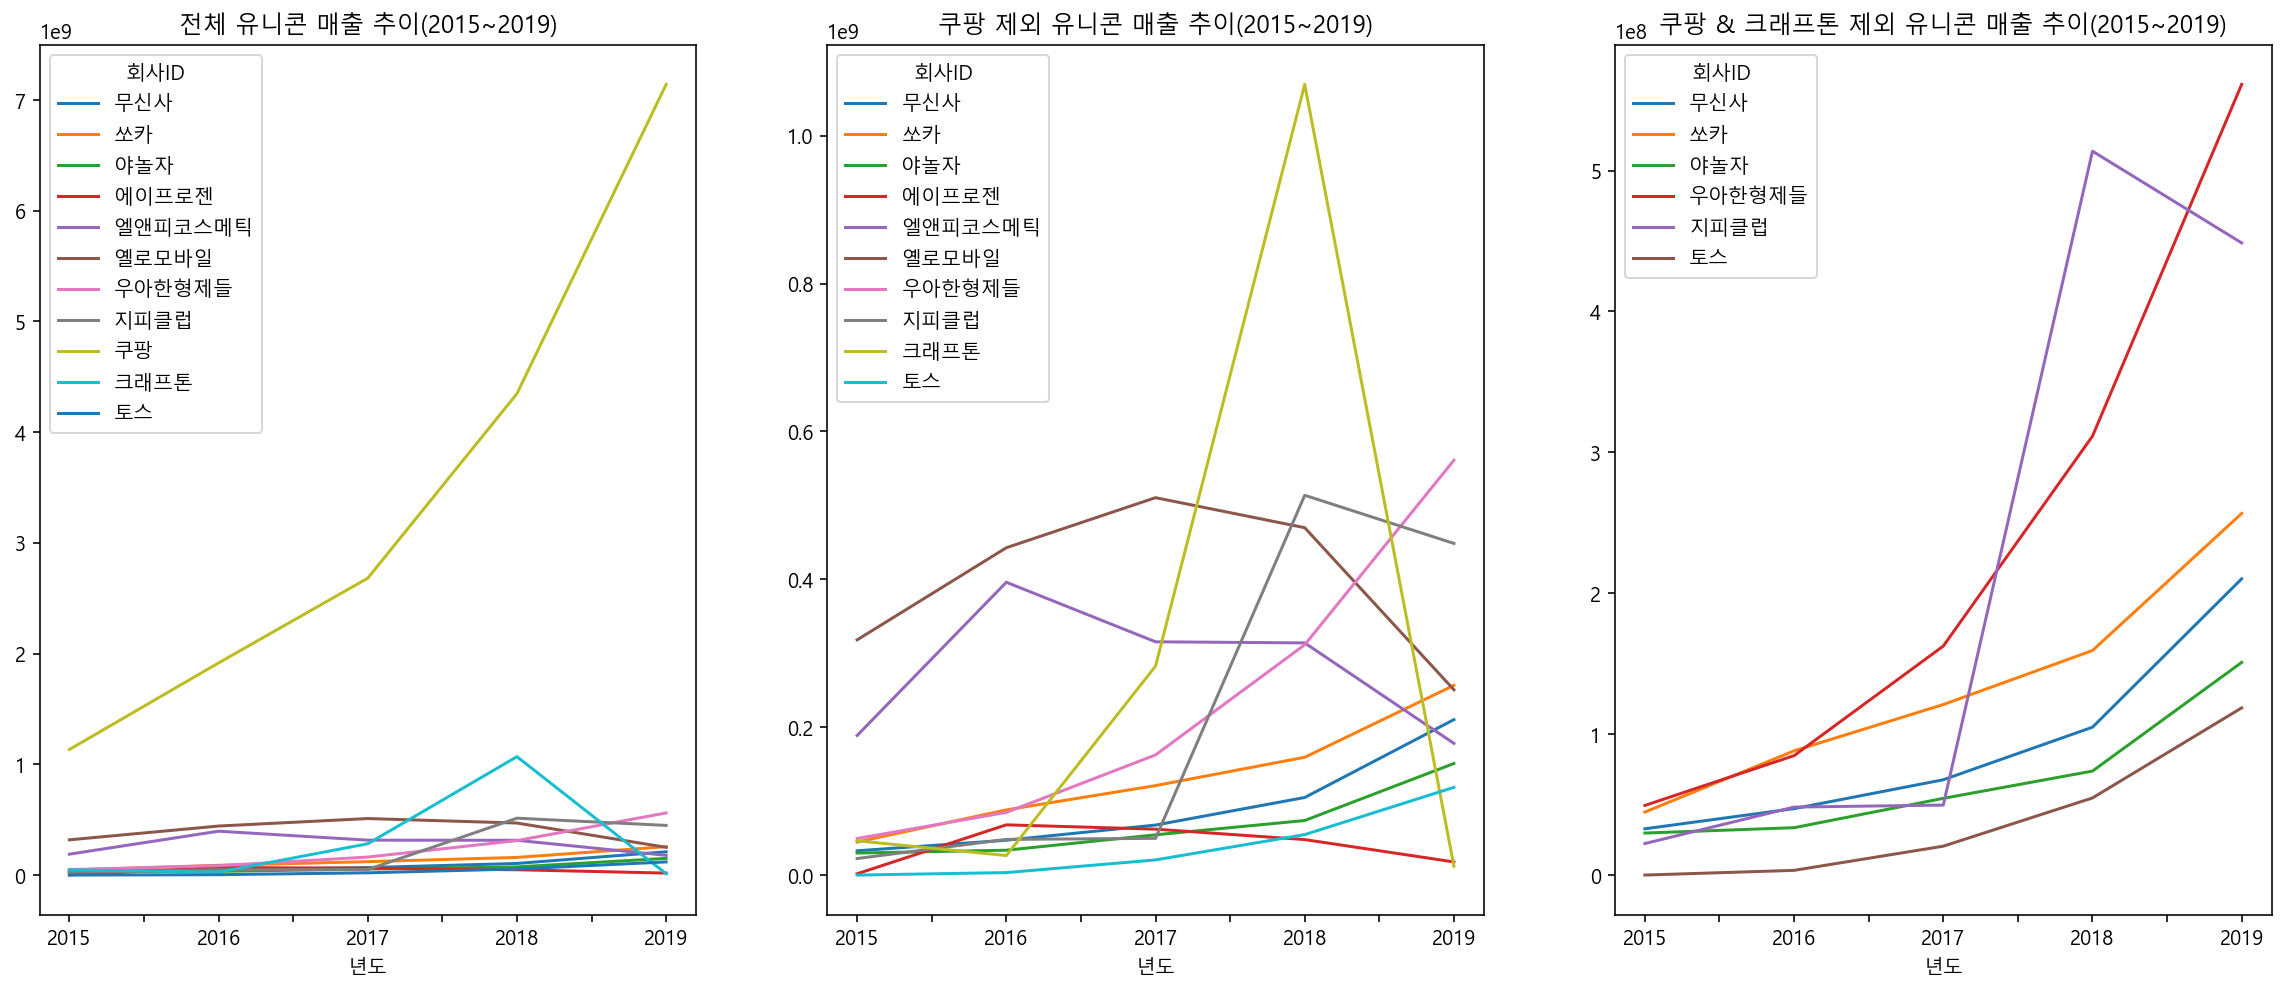

In [23]:
ndf = uni.pivot_table('연매출액','회사ID','년도')
ndf.columns = ndf.columns.map(lambda x : str(x))
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches([20, 8])
ndf.T.plot(ax=ax1)
ndf[ndf.index != '쿠팡'].T.plot(ax=ax2)
ndf.loc[(ndf.index != '쿠팡') & (ndf.index != '크래프톤')& (ndf.index != '에이프로젠')& (ndf.index != '옐로모바일')& (ndf.index != '엘앤피코스메틱')].T.plot(ax=ax3)
ax1.set_title('전체 유니콘 매출 추이(2015~2019)')
ax2.set_title('쿠팡 제외 유니콘 매출 추이(2015~2019)')
ax3.set_title('쿠팡 & 크래프톤 제외 유니콘 매출 추이(2015~2019)')

* 2014년에 유니콘 선정된 쿠팡과 옐로모바일을 제외한 크래프톤(2018), 토스(2018), 우아한형제들(2018), 야놀자(2019), 지피클럽(2019), 무신사(2019), 쏘카(2020) 등 주요 유니콘 기업들의 매출 추이는 유니콘 선정에 가까울수록 대체로 증가하는 모양새
* 단, 크래프톤은 유니콘 기업 선정 다음 해에 연매출 급락
* 에이프로젠(2019)은 큰 매출 변동이 없었고, 엘앤피코스메틱(2017)의 연매출은 유니콘 선정
* 괄호 안 숫자는 유니콘 선정 시점

* 유니콘 기업 선정을 위해 연매출 수치값의 기준이 필요하다

### (2). 연매출액 성장률 관련

In [24]:
uni3 = uni.copy()
uni3 = uni3.pivot_table(index='회사ID', columns='년도', values='연매출액')

In [25]:
# 유니콘 데이터 연매출액 연평균 성장률(CARG) 계산
# 유니콘 데이터는 2015년~2019년까지 결측치가 없으므로 <기간수 컬럼 value = 4>로 설정
uni3['기간수'] = 4
uni3['연평균 성장률(%)'] = ((uni3[2019]/uni3[2015]) ** (1/uni3['기간수']) - 1) * 100

display(uni3.describe())
display(uni3.sort_values(by="연평균 성장률(%)", ascending=False).head())

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,169885220.18,286837507.36,393506218.00,678876346.36,849641871.45,4.00,86.03
std,333757220.44,560786109.46,773437303.30,1253162515.22,2093019482.77,0.00,139.85
min,99100.00,3439965.00,20591083.00,48100298.00,12102432.00,4.00,-28.54
25%,26186617.50,40470297.50,58353124.50,89448620.00,134865484.50,4.00,24.23
50%,44800000.00,68032078.00,121086079.00,311535460.00,210312756.00,4.00,58.42
75%,119179626.50,242179430.00,299126349.50,491814355.00,352656850.00,4.00,80.20
max,1133752000.00,1915941000.00,2681390000.00,4347684000.00,7140720000.00,4.00,488.33


년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
토스,99100,3439965,20591083,54820876,118730969,4,488.33
지피클럽,22474017,48329929,49755792,513728710,448642100,4,111.38
우아한형제들,49500000,84850263,162565237,311535460,561133434,4,83.49
에이프로젠,1823518,68032078,62178381,48100298,17857139,4,76.90
무신사,32930316,47231240,67721259,105012384,210312756,4,58.97


* 유니콘 기업 선정을 위한 연매출액 성장률과 일인당 매출액 성장률의 기준이 필요하다

### (3). 직원수 관련

In [26]:
uni.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,지피클럽,22474017,2015,11,733104.00,8
1,지피클럽,22474017,2015,12,745068.00,7
2,지피클럽,48329929,2016,1,551118.00,7
3,지피클럽,48329929,2016,2,488133.00,7
4,지피클럽,48329929,2016,3,1073632.00,7


In [27]:
uni.pivot_table(index='회사ID',
                columns='년도',
                values='월별_직원수',
                aggfunc='min')

년도,2015,2016,2017,2018,2019
회사ID,,,,,
무신사,61,67,80,117,180
쏘카,89,98,266,266,292
야놀자,130,156,219,297,419
에이프로젠,84,86,130,107,126
엘앤피코스메틱,95,119,193,207,237
옐로모바일,35,35,126,34,11
우아한형제들,216,219,388,519,739
지피클럽,7,7,11,12,69
쿠팡,5465,4492,4905,5375,6188


<AxesSubplot:xlabel='년도'>

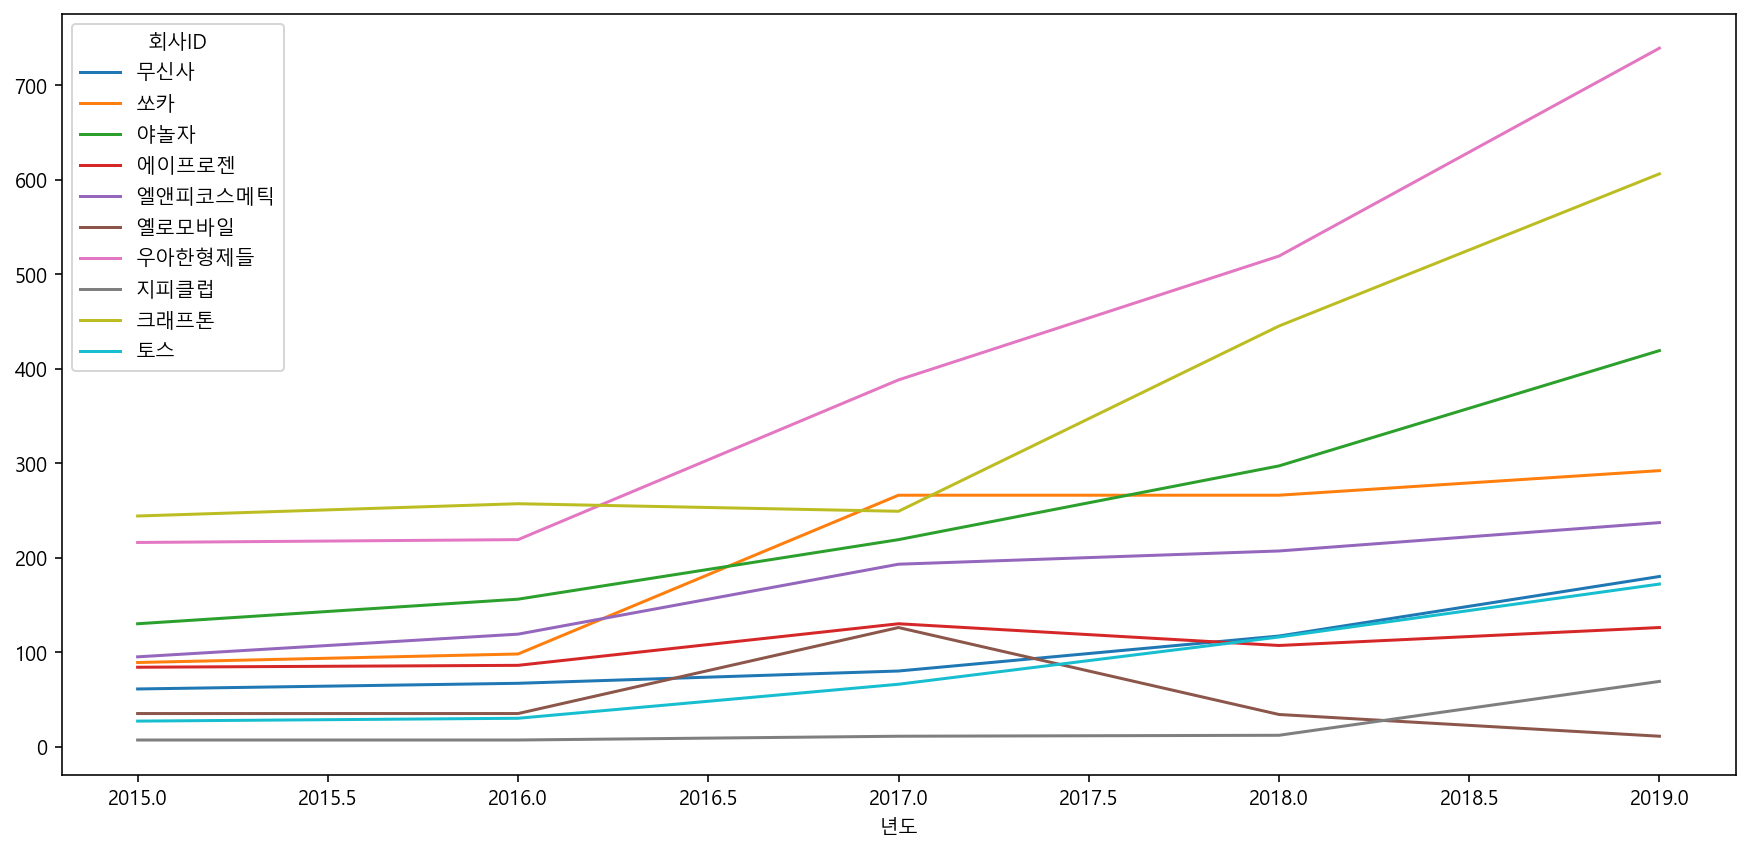

In [28]:
# 쿠팡 직원수가 다른 기업에 비해 매우 높으므로 그래프를 그리면 다른 기업들의 추이를 확인하기 어려움. 따라서, 쿠팡 제외하고 시각화
uni.loc[uni['회사ID'] != '쿠팡'].pivot_table(index='회사ID',
                columns='년도',
                values='월별_직원수',
                aggfunc='min').T.plot(kind='line', figsize=(15, 7))

* 유니콘 기업들의 연도별 직원수 최솟값을 본 결과, 대체로 증가하는 추이
* 유니콘 기업 선정을 위해 직원수의 기준이 필요하다

### (4). 월평균 연금보험료 관련

In [29]:
#연금보험료를 다루기 쉽게 데이터프레임 변경 
#월별 연금보험료의 결측치를 고려해 연도별 월 평균 연금보험료로 바꿈
uni4 = uni.groupby(['회사ID','년도']).mean()
uni4.reset_index(inplace=True)
uni4.rename(columns = {'월별_연금보험료' : '연도별_월평균연금보험료'}, inplace = True)
uni4.head()

,회사ID,년도,연매출액,월,연도별_월평균연금보험료,월별_직원수
0,무신사,2015,32930316.00,11.50,5921860.50,63.50
1,무신사,2016,47231240.00,6.50,7283040.33,74.25
2,무신사,2017,67721259.00,6.50,9954748.00,92.67
3,무신사,2018,105012384.00,6.50,16969701.42,143.58
4,무신사,2019,210312756.00,6.50,36105729.83,266.50


In [30]:
#기간 내 연금보험료 평균값이 높은 기업 분석
uni5 = uni4[['회사ID','연도별_월평균연금보험료']]
uni5 = uni5.groupby(['회사ID']).mean()
uni5.reset_index(inplace=True)
uni5.sort_values(by='연도별_월평균연금보험료',ascending=False,inplace=True)
uni5

,회사ID,연도별_월평균연금보험료
8,쿠팡,802979480.20
6,우아한형제들,762438227.47
10,토스,186789293.03
9,크래프톤,64068470.23
2,야놀자,42779282.34
4,엘앤피코스메틱,25250614.65
1,쏘카,24969436.04
0,무신사,15247016.02
3,에이프로젠,14262471.57
5,옐로모바일,8955012.78


유니콘 기업 선정을 위해 월평균 연금보험료의 기준이 필요하다

### (5). 1인당 연금보험료 연평균 성장률(임금 성장률) 관련

In [31]:
uni2 = uni.copy()
uni2['월연금보험료/월직원수'] = uni2['월별_연금보험료'] / uni2['월별_직원수']

In [32]:
# 유니콘 데이터 1인당 연금보험료 연평균 성장률 계산을 위한 피봇테이블 생성
uni2 = uni2.pivot_table(index='회사ID', columns='년도', values='월연금보험료/월직원수')

# 유니콘 데이터 1인당 연금보험료 연평균 성장률(CARG) 계산
# 유니콘 데이터는 2015년~2019년까지 결측치가 없으므로 <기간수 컬럼 value = 4>로 설정
uni2['기간수'] = 4
uni2['연평균 성장률(%)'] = ((uni2[2019]/uni2[2015]) ** (1/uni2['기간수']) - 1) * 100

display(uni2.describe())
display(uni2.sort_values(by="연평균 성장률(%)", ascending=False).head())

년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,332675.42,346986.41,381093.13,410404.51,442571.70,4.00,5.08
std,473545.52,506524.61,576211.00,620364.39,670807.43,0.00,3.09
min,93344.45,97955.25,91384.62,106823.75,117878.67,4.00,1.25
25%,109466.22,109321.43,112034.78,120805.11,130935.45,4.00,2.80
50%,129905.23,128797.15,132366.36,137369.59,147293.71,4.00,4.45
75%,145350.92,141787.40,145965.78,155148.57,164302.07,4.00,6.80
max,1342831.73,1409297.51,1586949.71,1730305.28,1858434.23,4.00,10.77


년도,2015,2016,2017,2018,2019,기간수,연평균 성장률(%)
회사ID,,,,,,,
토스,1234332.00,1331534.18,1586949.71,1730305.28,1858434.23,4,10.77
무신사,93344.45,97955.25,106840.89,117678.16,133904.69,4,9.44
야놀자,117441.23,108066.54,123614.54,135277.54,153600.66,4,6.94
우아한형제들,1342831.73,1409297.51,1503911.06,1596297.53,1737258.34,4,6.65
크래프톤,143053.02,138837.22,144683.14,157774.69,173417.85,4,4.93


* 유니콘 기업 선정을 위해 1인당 연금보험료 성장률의 기준이 필요하다

### 2.3. EDA결론 및 가설 설정

### 2.3.1. EDA결론

**(1). 유니콘 기업을 선정하기 위한 기준이 필요   
(2). 기준을 찾기 위해 실제 유니콘 기업들의 외부 데이터를 수집 후 원티드로부터 제공받은 데이터셋과 동일한 포맷으로 세팅   
(3). 주어진 데이터셋에서 활용할 수 있는 변수가 연매출액, 월별 연금보험료, 월별 직원수로 한정적이므로 각 변수들을 조합한 새로운 피처를 생성해야 함   
(4). 기존 피처 간의 조합을 통해 도출가능할 것으로 예상한 피처들을 생성하여 EDA 진행**

### 2.3.2. 가설 수립

**(1). 직원수가 많으면 유니콘 기업일 확률이 높을 것이다.** <br>
**(2). 특정기간에서 1인당 임금성장률이 높으면 유니콘 기업일 확률이 높다.**<br>
**(3). 월평균 임금보험료가 높으면 유니콘 기업일 확률이 높다.**<br>
**(4). 연매출액이 높으면 유니콘 기업일 확률이 높다.**<br>
**(5). 특정기간에서 연매출액 성장률이 높으면 유니콘기업일 확률이 높다.**<br>
**(6). 특정기간에서 일인당매출액 성장률이 높으면 유니콘 기업일 확률이 높다.**<br>

# 3. 수립한 가설바탕 데이터분석

### 3.1. 2015-2019 직원수 평균 

In [33]:
# 연평균 성장률을 구하기 위한 함수
def cagr(start_value, end_value, num_periods):
    return (end_value / start_value) ** (1 / (num_periods - 1)) - 1

In [34]:
# 유니콘 회사의 데이터를 연도별로 분류
유니콘회사_연도별_직원 = uni.groupby(['회사ID','년도'])['월별_직원수'].sum()
유니콘회사_연도별_직원 = 유니콘회사_연도별_직원.unstack()

In [35]:
# 유니콘기업의 최소 연평균 성장률 산출
# 약 32퍼센트
유니콘기업_직원_성장률 = []
for company in range(0, 11):
   유니콘기업_직원_성장률.append(cagr(유니콘회사_연도별_직원.iloc[company, 0], 유니콘회사_연도별_직원.iloc[company, -1], 5))
유니콘기업_최소_성장률 = np.min(유니콘기업_직원_성장률)

In [36]:
# 주어진 데이터를 연도별로 분류
연도별_직원 = data.pivot_table('월별_직원수', '회사ID', '년도')
연도별_직원.index = 연도별_직원.index.map(lambda x : str(x))
연도별_직원.columns = 연도별_직원.columns.map(lambda x : str(x))
연도별_직원.dropna(thresh=2, inplace=True)

In [37]:
# 직원 수가 최소 35명 이상인 회사들을 추출
직원수_분류 = data.query("월별_직원수 > 35")
직원수_분류 = 직원수_분류.pivot_table('월별_직원수', '회사ID', '년도')
직원수_분류.index = 직원수_분류.index.map(lambda x : str(x))
직원수_분류.columns = 직원수_분류.columns.map(lambda x : str(x))
직원수_분류 = 직원수_분류.mean(axis=1)

### 3.2 2015-2019 1인당 임금 평균성장률

In [38]:
df_wage = df.copy()
df_wage['월연금보험료/월직원수'] = df_wage['월별_연금보험료']/df_wage['월별_직원수']
df_wage.head()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,월연금보험료/월직원수
0,233757,41688077,2018,7,8912380,36,247566.11
1,123464,1760695,2018,3,942380,5,188476.00
2,342124,3221341,2018,7,781180,4,195295.00
3,386420,4815584,2015,11,3795900,14,271135.71
4,129243,9799736,2018,10,40724680,151,269699.87


In [39]:
# 제공받은 데이터(가공) 1개년도 데이터만 존재하는 경우 소거(연평균 성장률 계산을 위해선 최소 2개년도 이상 데이터 필요)
# (10109, 3)에서 소거 후 (7700, 3). 중복 제외한 기업 수(unique value): 2589개
df_wage = df_wage.pivot_table(index=['회사ID', '년도'], values='월연금보험료/월직원수')
df_wage = df_wage.reset_index()
duplicate_data = df_wage.duplicated('회사ID', keep=False).loc[df_wage.duplicated('회사ID', keep=False)].index.tolist()
df_wage2 = df_wage.loc[df_wage.index.isin(duplicate_data)]

# 제공받은 데이터(가공)의 1인당 연금보험료 연평균 성장률 계산을 위한 피봇테이블 생성
df_wage3 = df_wage2.pivot_table(index='회사ID', columns='년도', values='월연금보험료/월직원수')
df_wage3.head()

년도,2015,2016,2017,2018,2019
회사ID,,,,,
14271,235527.82,246262.68,218312.84,210208.93,213832.73
44851,nan,184970.55,nan,227407.50,nan
59533,90088.00,91392.06,91044.56,90705.42,nan
122968,209669.32,215674.28,222730.36,212510.30,nan
122983,198738.76,207154.75,215582.28,nan,nan


In [40]:
# 연평균 성장률(CARG) 공식: CAGR = ((종료값/초기값)^(1/기간수)) - 1 
# 기간수 컬럼 생성
df_wage3['기간수'] = 0
for i in range(len(df_wage3)):
    df_wage3.iloc[i, 5] = df_wage3.iloc[i].notnull().sum() - 2

# 결측치가 있는 연도: 앞뒤 값으로 결측치 채우기
# 연평균 성장률 공식에서 중요한 것은 초기값(시작값)과 종료값이므로, 앞뒤의 값으로 결측치를 채워도 문제되지 않음
df_wage4 = df_wage3[[2015, 2016, 2017, 2018, 2019]].copy()
df_wage4.T.fillna(method='ffill', inplace=True)
df_wage4.T.fillna(method='bfill', inplace=True)
df_wage4['기간수'] = df_wage3['기간수']

In [41]:
# 제공받은 데이터(가공)의 1인당 연금보험료 연평균 성장률 소거 기준 : 1.25% 미만
# 제공받은 데이터(가공)의 1인당 연금보험료 연평균 성장률 계산
df_wage4['연평균 성장률(%)'] = ((df_wage4[2019]/df_wage4[2015]) ** (1/df_wage4['기간수']) - 1) * 100
df_wage5 = df_wage4.loc[df_wage4['연평균 성장률(%)'] >= 1.25]
df_wage6 = df_wage5.sort_values(by='연평균 성장률(%)', ascending=False)

# 1인당 연금보험료 연평균 성장률 상위 50개 기업 추출
df_wage_top500 = df_wage6['연평균 성장률(%)'].head(500).to_frame().reset_index()
df_wage_top500

,회사ID,연평균 성장률(%)
0,478999,276.79
1,515562,226.54
2,124581,191.71
3,472629,161.71
4,146381,111.88
5,254150,110.77
6,419289,98.81
7,513441,88.02
8,172373,80.25
9,291300,77.83


### 3.3. 2015-2019 월평균 임금보험료 평균

In [42]:
#연금보험료를 다루기 쉽게 데이터프레임 변경 
#월별 연금보험료의 결측치를 고려해 연도별 월 평균 연금보험료로 바꿈
df_year = df.groupby(['회사ID','년도']).mean()
df_year.reset_index(inplace=True)
df_year.rename(columns = {'월별_연금보험료' : '연도별_월평균연금보험료'}, inplace = True)
df_year

,회사ID,년도,연매출액,월,연도별_월평균연금보험료,월별_직원수
0,63,2018,11328779396.00,6.50,410128228.33,1007.17
1,95,2018,656947437.00,6.50,214837843.33,541.00
2,102,2018,742658938.00,8.50,173769522.50,752.12
3,295,2018,83776697.00,8.50,77312035.00,259.50
4,414,2018,19732769.00,6.50,77590193.33,247.58
...,...,...,...,...,...,...
10106,2400284,2018,1263406.00,7.00,1055497.14,4.71
10107,2437574,2018,214016.00,5.00,636740.00,3.00
10108,2693684,2019,238076.00,9.50,438120.00,3.00
10109,3312354,2019,1451563.00,10.00,1312200.00,3.00


In [43]:
#기간 내 연금보험료 평균값이 높은 기업 분석
df_year_penrank=df_year[['회사ID','연도별_월평균연금보험료']]
df_year_penrank=df_year_penrank.groupby(['회사ID']).mean()
df_year_penrank.reset_index(inplace=True)
df_year_penrank.sort_values(by='연도별_월평균연금보험료',ascending=False,inplace=True)

In [44]:
#기간 내 연금보험료 최대값이 높은 기업 Top 500개 획득
df_pen_top500=df_year_penrank.head(500)
df_pen_top500.reset_index(inplace=True)
df_pen_top500.drop(['index'],axis=1,inplace=True)
df_pen_top500

,회사ID,연도별_월평균연금보험료
0,227414,848532802.50
1,419945,838814933.33
2,227415,833628100.42
3,126516,564440444.44
4,126521,528434259.58
5,439902,489029400.00
6,469458,482713946.11
7,63,410128228.33
8,419977,391094838.33
9,547586,388365113.33


### 3.4. 2015-2019 연매출액 평균

In [45]:
# 피벗 테이블로 '연매출액','회사ID','년도' 만 포함된 데이터프레임 생성
ndf = df.pivot_table('연매출액','회사ID','년도')

In [46]:
# 인덱스와 컬럼 자료형 변환
ndf.index = ndf.index.map(lambda x : str(x))
ndf.columns = ndf.columns.map(lambda x : str(x))

In [47]:
# '연평균 성장률' 변수 중 기간(n)을 구하기
# '기간'이라는 칼럼 생성 후 임의의 값 부여
ndf['기간'] = 0

In [48]:
# 한 행씩 접근하며 널값이 아닌 데이터들의 개수를 세서 '기간' 칼럼에 저장
# 그 후 2를 빼줌( "notnull()로 세어진'기간'칼럼" 과 "두 연도의 차이" )   
for i in range(len(ndf)):
    ndf['기간'][i] = ndf.iloc[i].notnull().sum()-2

In [49]:
# 연매출액 평균 구하기 및 TOP500 선정
ndf1 = ndf[ndf['기간']!=0]
ndf1 = ndf1.replace(np.nan,0)
ndf1['평균연매출액'] = (ndf1['2015']+ndf1['2016']+ndf1['2017']+ndf1['2018']+ndf1['2019'])/(ndf1['기간']+1)
평균연매출액TOP500 = ndf1['평균연매출액'].sort_values(ascending=False).head(500)
평균연매출액TOP500 

회사ID
419945   8353127318.00
227415   5241048566.25
227414   4459101961.50
419977   4252085666.67
294649   3833816138.25
419998   3538392528.67
126831   2015576589.25
420008   1466671121.67
381180   1434089780.75
297874   1131215860.25
126606    996220277.00
294620    700816694.75
126538    678928625.25
294367    661343985.25
126516    644410461.33
146654    644378896.75
294530    640891151.75
126521    562550705.50
126814    518500331.75
126674    502603404.25
420046    497181958.33
127090    484221008.25
426429    463223530.00
403351    447749259.50
130729    398156883.75
440030    375572710.33
127511    360452352.00
126664    309507777.50
127060    300223740.00
382850    290654183.00
126772    283882864.50
130387    277043257.50
232757    220443926.00
231173    209666330.00
130322    203902254.75
127180    189022972.75
297327    184834626.75
294337    182143896.00
127669    166612897.00
126983    152661062.75
403434    151733523.75
294387    151086047.25
128539    149316829.25
128896

### 3.5. 2015-2019 연매출액 평균성장률

In [51]:
# 연매출액 연평균 성장률을 구하기 위해 2015년과 2019를 기준으로 결측치들을 앞과 뒤의 값들로 채워줌 (기간을 미리구해놨기 때문에 가능)
# '기간' 칼럼 제외한 새로운 데이터프레임으로 복사 (연도의 널값을 채워주기 위해) 
ndf1 = ndf[['2015','2016','2017','2018','2019']]

In [52]:
# 계산의 편의상 시작값(2015로)과 종료값(2019로)을 맞춰주기 위해 널값 채우기
ndf1.T.fillna(method = 'ffill',inplace=True)
ndf1.T.fillna(method = 'bfill',inplace=True)

In [53]:
# 널값 채운 후 다시 '기간'칼럼 붙여주기
ndf1['기간'] = ndf['기간']

In [54]:
# 기간이 0인 데이터들 소거
# 기간이 0이면 1년치의 데이터밖에 없기 때문에 성장률을 알 수가 없기 때문
# 연매출액 데이터가 하나뿐임
ndf1 = ndf1[ndf1['기간'] != 0]

In [55]:
# 연평균 성장률 계산 후, 유니콘 데이터 기준 min()값인 -28.54 미만의 데이터 소거
ndf1['연평균 성장률(%)'] = round(((ndf1['2019']/ndf1['2015'])**(1/ndf1['기간'])-1)*100, 2)
ndf1 = ndf1[ndf1['연평균 성장률(%)'] >= -28.54]

In [56]:
# 유니콘 데이터 기준 연매출액 min() 값인 99100 미만 데이터 소거
ndf1 = ndf1.loc[(ndf1['2015'] >= 99100) & (ndf1['2016'] >= 99100) & (ndf1['2017'] >= 99100) & (ndf1['2018'] >= 99100) & (ndf1['2019'] >= 99100)]

In [57]:
# 1년씩 성장률 계산
ndf1['15-16년 성장률'] = round(((ndf1['2016']-ndf1['2015'])/ndf1['2015'])*100, 1)
ndf1['16-17년 성장률'] = round(((ndf1['2017']-ndf1['2016'])/ndf1['2016'])*100, 1)
ndf1['17-18년 성장률'] = round(((ndf1['2018']-ndf1['2017'])/ndf1['2017'])*100, 1)
ndf1['18-19년 성장률'] = round(((ndf1['2019']-ndf1['2018'])/ndf1['2018'])*100, 1)

In [58]:
# 계산된 성장률의 max()값으로 해당기간 성장률 최고치 계산
ndf1['성장률 최고치']=0.0
for i in range(len(ndf1)):
    ndf1['성장률 최고치'][i]=max(ndf1['15-16년 성장률'][i],ndf1['16-17년 성장률'][i],ndf1['17-18년 성장률'][i],ndf1['18-19년 성장률'][i])

In [59]:
# 유니콘 데이터 기준 성장률 최고치 min() 값인 39.2% 미만 데이터 소거
ndf1 = ndf1.loc[ndf1['성장률 최고치']>=39.2]
ndf1 # 최종 데이터가 5000개에서 768개로 줄어든 것을 알 수 있다.

년도,2015,2016,2017,2018,2019,기간,연평균 성장률(%),15-16년 성장률,16-17년 성장률,17-18년 성장률,18-19년 성장률,성장률 최고치
회사ID,,,,,,,,,,,,
14271,1199495.00,4257715.00,5005248.00,8388401.00,9039340.00,4,65.69,255.00,17.60,67.60,7.80,255.00
123548,1373237.00,1373237.00,1975096.00,1975096.00,1975096.00,1,43.83,0.00,43.80,0.00,0.00,43.80
123882,289034.00,289034.00,1044575.00,5293947.00,5293947.00,2,327.97,0.00,261.40,406.80,0.00,406.80
124223,2400795.00,3381835.00,3473757.00,3473757.00,3473757.00,2,20.29,40.90,2.70,0.00,0.00,40.90
124386,621771.00,621771.00,1295805.00,1010237.00,1010237.00,2,27.47,0.00,108.40,-22.00,0.00,108.40
124463,314769.00,522098.00,713189.00,613629.00,613629.00,3,24.92,65.90,36.60,-14.00,0.00,65.90
124535,240989.00,240989.00,185485.00,341241.00,341241.00,2,19.00,0.00,-23.00,84.00,0.00,84.00
124581,201205.00,391037.00,391037.00,391037.00,391037.00,1,94.35,94.30,0.00,0.00,0.00,94.30
125312,204425.00,294163.00,294163.00,476800.00,476800.00,2,52.72,43.90,0.00,62.10,0.00,62.10


In [60]:
# 연평균 성장률 TOP500 구하기
연매출액성장률TOP500 = ndf1['연평균 성장률(%)'].sort_values(ascending=False).head(500)
연매출액성장률TOP500 

회사ID
177997   1451.48
237193    979.16
413403    834.29
432907    727.52
206055    700.00
243409    566.91
446886    443.21
359487    435.92
254150    432.73
310421    408.40
435512    391.43
267318    390.24
475113    386.21
237075    380.42
246630    377.87
281400    359.42
156945    351.47
123882    327.97
172962    326.08
251353    320.27
186856    302.97
448247    292.53
270460    291.33
258975    274.07
252545    265.96
408351    255.35
288613    255.05
250882    254.05
478219    245.80
233340    239.84
437305    238.84
336600    238.72
228689    238.49
357606    237.33
242470    235.06
394749    231.41
406773    231.08
332914    230.06
231400    221.81
412652    221.74
237311    216.01
151715    214.19
412523    213.80
257336    210.31
414905    203.12
306768    202.66
451016    200.39
146761    199.95
244614    199.58
216845    195.38
490685    193.98
266825    189.34
206215    181.44
191020    177.61
267104    176.95
256469    175.70
246443    175.68
143752    174.43
265597   

### 3.6. 2015-2019 일인당매출액 평균성장률

In [61]:
n1df=df.copy()

In [62]:
# 일인당 매출액 컬럼 생성
n1df['일인당 매출액'] = round(n1df['연매출액']/n1df['월별_직원수'], 2)

In [63]:
# 회사ID와 년도별로 묶어 일인당 매출액의 연평균을 구하기
n2df = n1df.groupby(['회사ID','년도']).mean()

In [64]:
# 필요한 칼럼들만 추출
n2df.drop(['연매출액','월','월별_연금보험료','월별_직원수'],axis=1,inplace=True)

In [65]:
# 시계열로 나타낼 수 있게 피벗테이블 생성
n2df1 = n2df.pivot_table('일인당 매출액','회사ID','년도')
n2df1.index = n2df1.index.map(lambda x : str(x))
n2df1.columns = n2df1.columns.map(lambda x : str(x))

In [66]:
# '기간'이라는 칼럼 생성 후 임의의 값 부여
n2df1['기간'] = 0

In [67]:
# 한 행씩 접근하며 널값이 아닌 데이터들의 개수를 세서 '기간' 칼럼에 저장
for i in range(len(n2df1)):
    n2df1['기간'][i] = n2df1.iloc[i].notnull().sum()

In [68]:
# 그 후 2를 빼줌( "notnull()로 세어진'기간'칼럼" 과 "두 연도의 차이" )    
n2df1['기간']=n2df1['기간']-2

In [69]:
# '기간' 칼럼 제외한 새로운 데이터프레임으로 복사 (연도의 널값을 채워주기 위해) 
n2df2 = n2df1[['2015','2016','2017','2018','2019']]

In [70]:
#계산의 편의상 시작값(2015로)과 종료값(2019로)을 맞춰주기 위해 널값 채우기
n2df2.T.fillna(method = 'ffill',inplace=True)
n2df2.T.fillna(method = 'bfill',inplace=True)

In [71]:
# 널값 채운 후 다시 '기간'칼럼 붙여주기
n2df2['기간'] = n2df1['기간']

In [72]:
# 기간이 0인 데이터 소거
n2df2 = n2df2[n2df2['기간'] != 0]

In [73]:
# 일인당 매출액의 '연평균 성장률' 컬럼 생성
n2df2['연평균 성장률(%)'] = round(((n2df2['2019']/n2df2['2015'])**(1/n2df2['기간'])-1)*100, 2)

In [74]:
# 유니콘 데이터 기준 '연평균 성장률' ''-44.66% 미만' 데이터 소거
n2df2 = n2df2[n2df2['연평균 성장률(%)'] >= -44.66]

In [75]:
# 유니콘 데이터 기준 '일인당 연매출' '3604.83 미만' 데이터 소거
n2df2 = n2df2.loc[(n2df2['2015'] >= 3604.83) & (n2df2['2016'] >= 3604.83) & (n2df2['2017'] >= 3604.83) & (n2df2['2018'] >= 3604.83) & (n2df2['2019'] >= 3604.83)]

In [76]:
# 일인당 매출액의 '작년 대비 성장률' 컬럼 4개 생성
n2df2['15-16년 성장률'] = round(((n2df2['2016']-n2df2['2015'])/n2df2['2015'])*100, 1)
n2df2['16-17년 성장률'] = round(((n2df2['2017']-n2df2['2016'])/n2df2['2016'])*100, 1)
n2df2['17-18년 성장률'] = round(((n2df2['2018']-n2df2['2017'])/n2df2['2017'])*100, 1)
n2df2['18-19년 성장률'] = round(((n2df2['2019']-n2df2['2018'])/n2df2['2018'])*100, 1)

In [77]:
# 일인당 매출액의 '성장률 최고치' 컬럼 생성
n2df2['성장률 최고치']=0.0
for i in range(len(n2df2)):
    n2df2['성장률 최고치'][i]=max(n2df2['15-16년 성장률'][i],n2df2['16-17년 성장률'][i],n2df2['17-18년 성장률'][i],n2df2['18-19년 성장률'][i])

In [78]:
# 유니콘 데이터 기준 '성장률 최고치'가 23.2% 미만인 데이터 소거
n2df2 = n2df2.loc[n2df2['성장률 최고치']>=23.2]

In [79]:
# 직원수가 0인 컬럼이 있어서, 연매출액을 나눠준뒤 inf값이 생김. 그것을 처리
n2df2 = n2df2.replace(np.inf,np.nan).dropna(axis=0)

In [80]:
# 일인당 연매출액 연평균 성장률 TOP500 추출
일인당연매출액성장률TOP500 = n2df2['연평균 성장률(%)'].sort_values(ascending=False).head(500)
일인당연매출액성장률TOP500 

회사ID
417469   5646.83
177997   1377.14
413403   1103.88
246630   1002.49
470208    936.55
432907    635.00
359487    589.48
237193    508.90
475113    493.66
172962    439.04
446886    399.32
243409    369.05
435512    356.21
451016    354.01
332914    333.01
295827    329.58
251353    326.11
310421    325.62
325527    321.49
237075    313.93
206055    306.85
281400    290.51
123882    270.59
252545    260.82
231400    260.09
140370    255.76
250882    240.84
186856    233.50
490685    223.56
386590    221.31
228393    212.95
448247    210.85
412652    202.59
267318    199.71
288613    195.87
216845    195.38
409733    192.17
258975    190.08
266825    188.65
434452    185.25
244614    181.33
254150    180.55
319847    178.92
189006    177.22
265597    176.67
485195    176.57
437305    175.31
382975    166.73
281522    164.18
163735    160.99
228689    160.81
210312    157.25
246443    156.01
289014    153.54
414905    149.59
453311    145.31
411503    144.83
140801    144.79
216628   

### 4. 최종결론

### 4.1. 결론 도출 과정

**(1). 가설에 따라 선정된 6개의 항목별로 TOP 500 기업을 선정(중복포함 총 3000개 선정)     
(2). 항목별 유니콘으로 부를 수 있는 최소조건을 만족시키지 못하는 기업을 탈락시킴   
(3). 탈락된 기업을 제외한 2886개을 기업 중 중복횟수가 많은 순으로 정렬   
(4). TOP6 선정**

### 4.2. 최종 선정 6개 유니콘 기업

**(1). 127366     
(2). 138709   
(3). 133493   
(4). 128405      
(5). 135037   
(6). 129527**

In [81]:
df_year_gr=df.groupby(['회사ID','년도']).mean()
df_year_gr.reset_index(inplace=True)
df_year_gr.drop(['월'],axis=1,inplace=True)
df_year_gr

,회사ID,년도,연매출액,월별_연금보험료,월별_직원수
0,63,2018,11328779396.00,410128228.33,1007.17
1,95,2018,656947437.00,214837843.33,541.00
2,102,2018,742658938.00,173769522.50,752.12
3,295,2018,83776697.00,77312035.00,259.50
4,414,2018,19732769.00,77590193.33,247.58
...,...,...,...,...,...
10106,2400284,2018,1263406.00,1055497.14,4.71
10107,2437574,2018,214016.00,636740.00,3.00
10108,2693684,2019,238076.00,438120.00,3.00
10109,3312354,2019,1451563.00,1312200.00,3.00


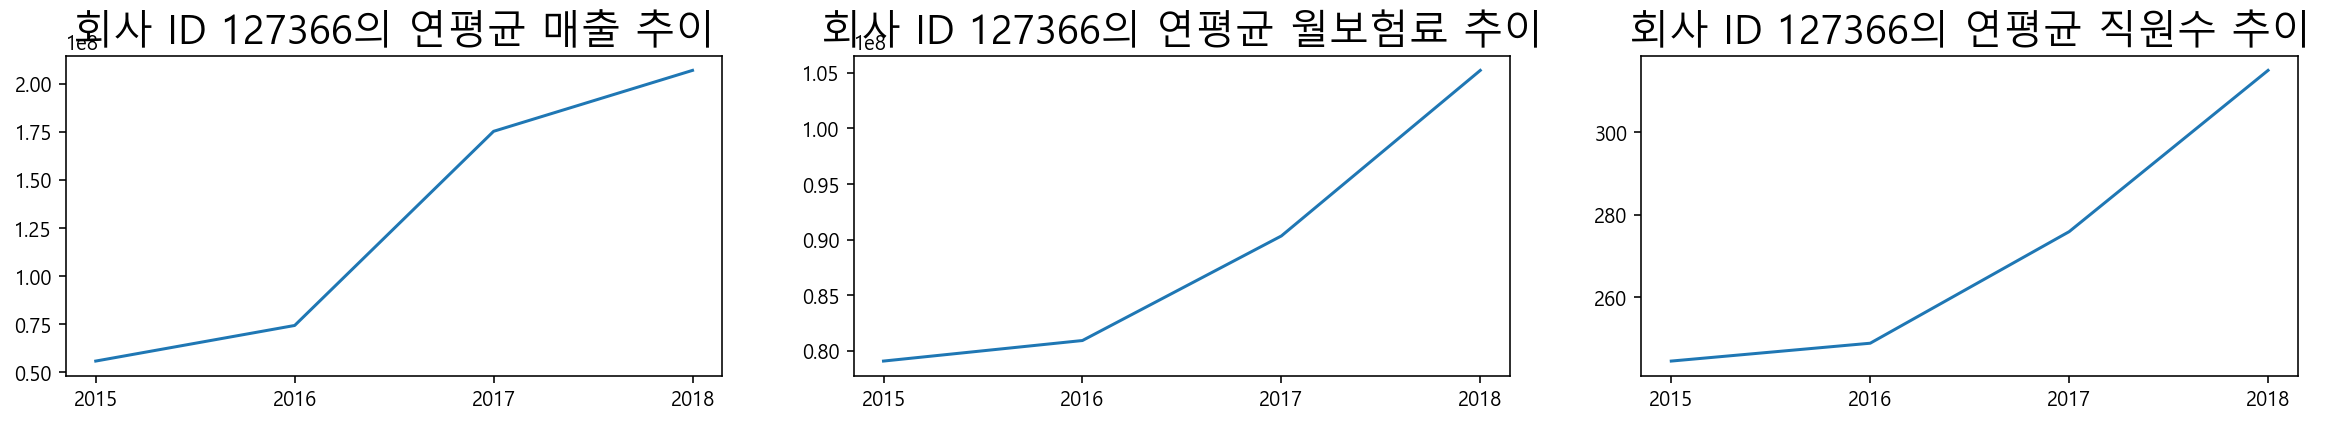

In [82]:
#회사 ID 127366 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==127366]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 127366의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 127366의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 127366의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()

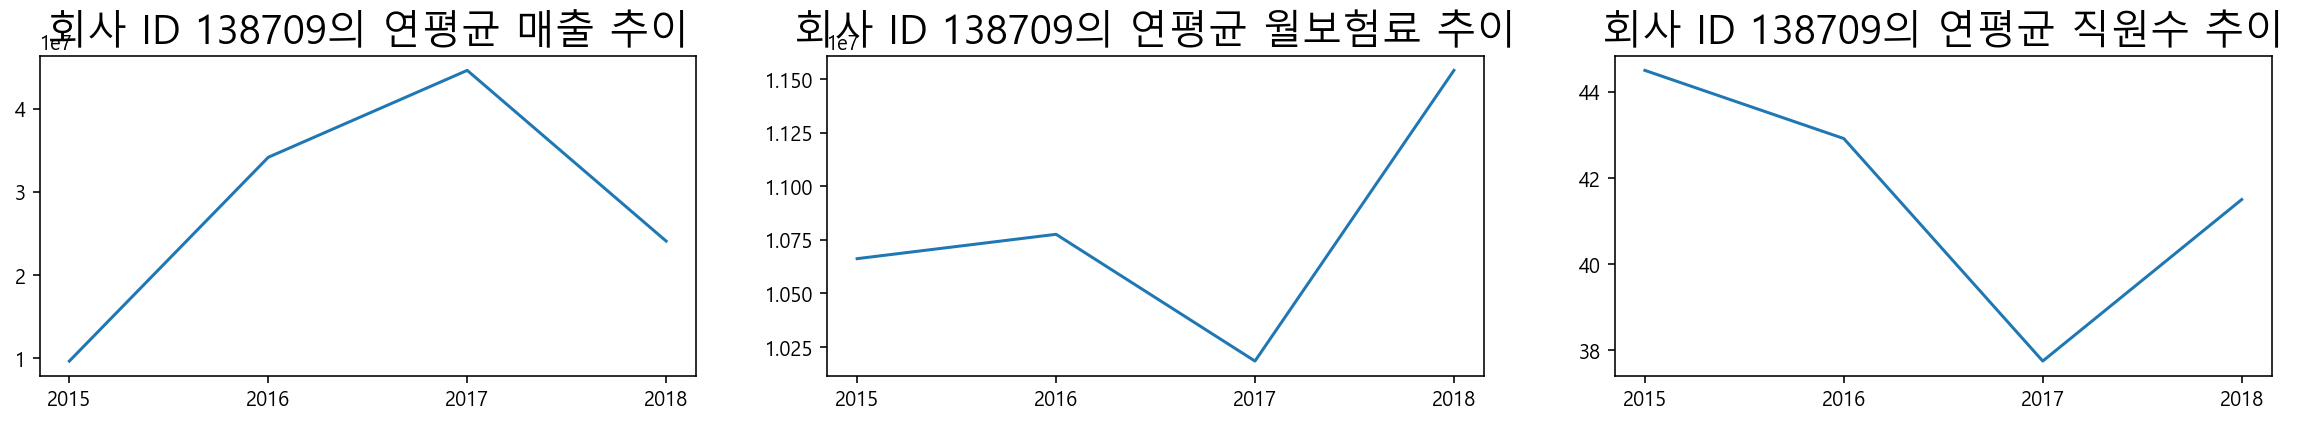

In [83]:
#회사 ID 138709의 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==138709]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 138709의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 138709의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 138709의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()

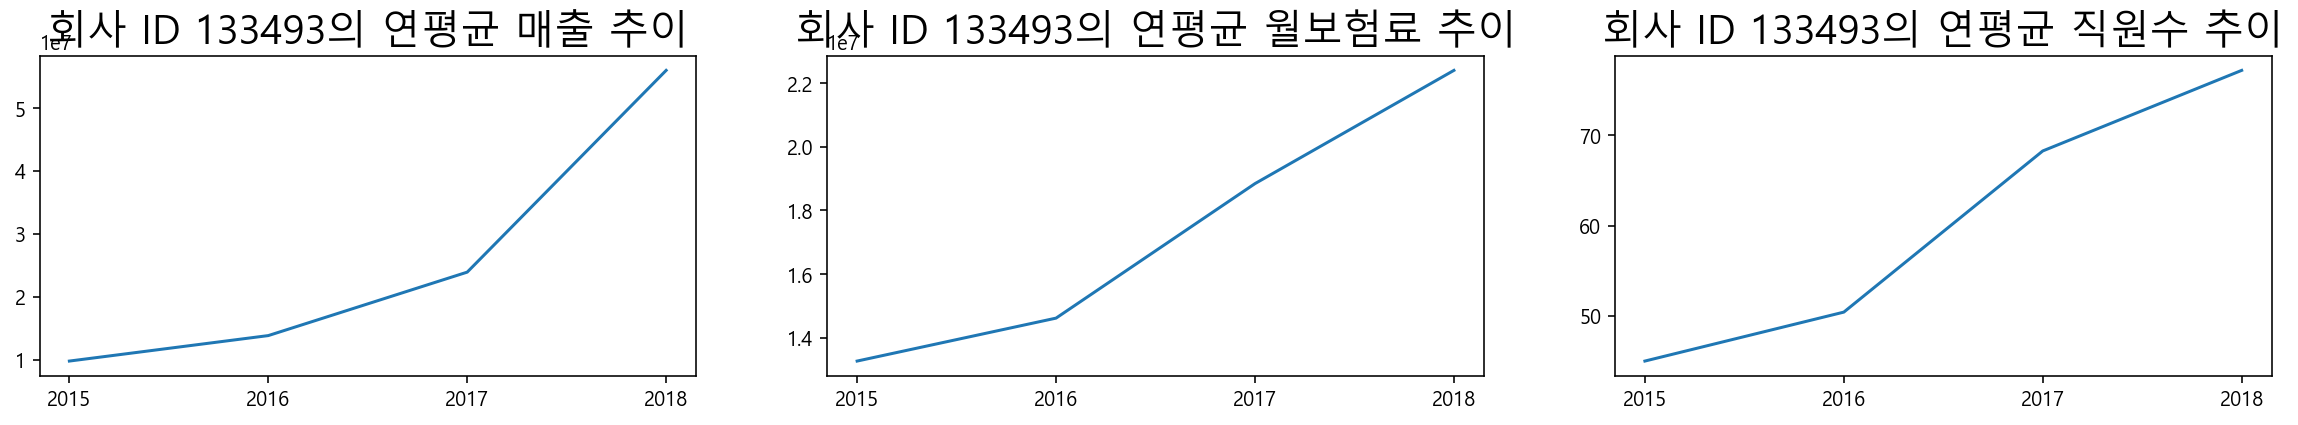

In [84]:
#회사 ID 133493 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==133493]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 133493의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 133493의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 133493의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()

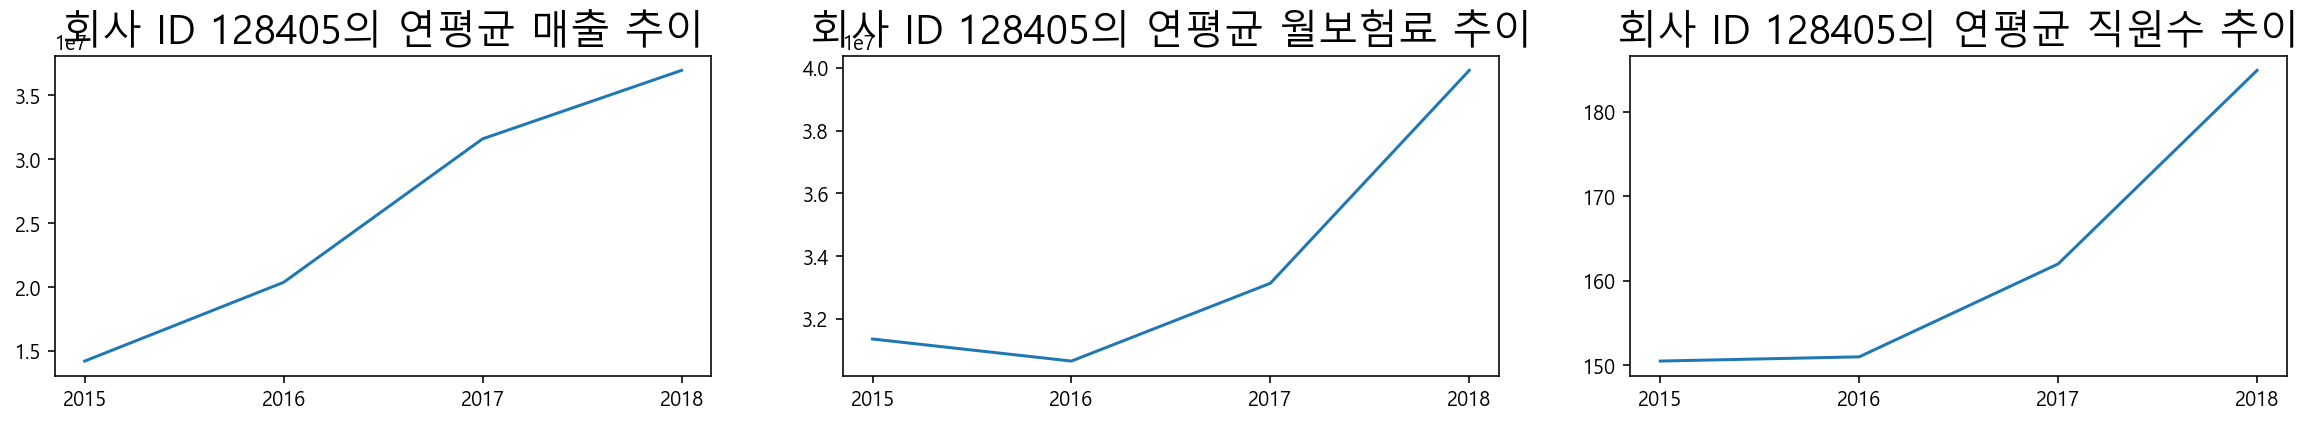

In [85]:
#회사 ID 1128405 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==128405]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 128405의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 128405의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 128405의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()

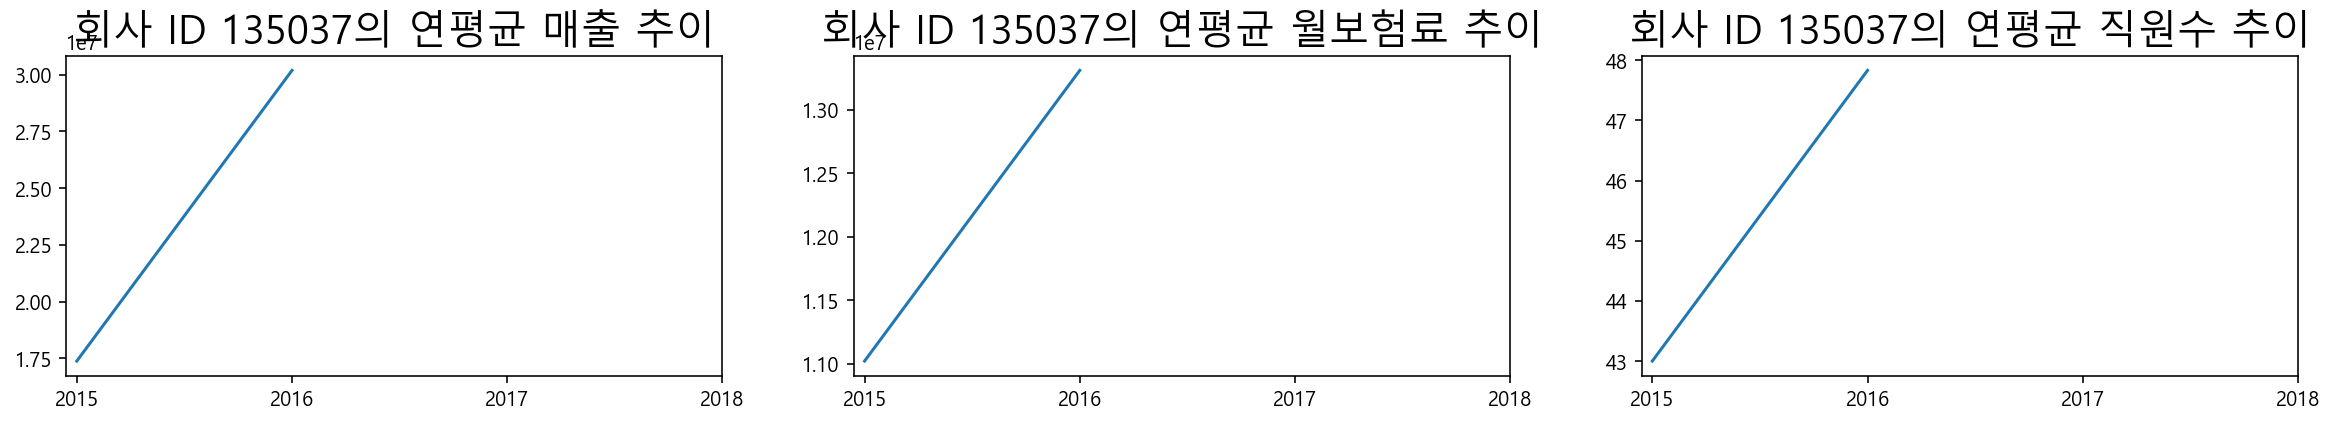

In [86]:
#회사 ID 135037 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==135037]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 135037의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 135037의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 135037의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()

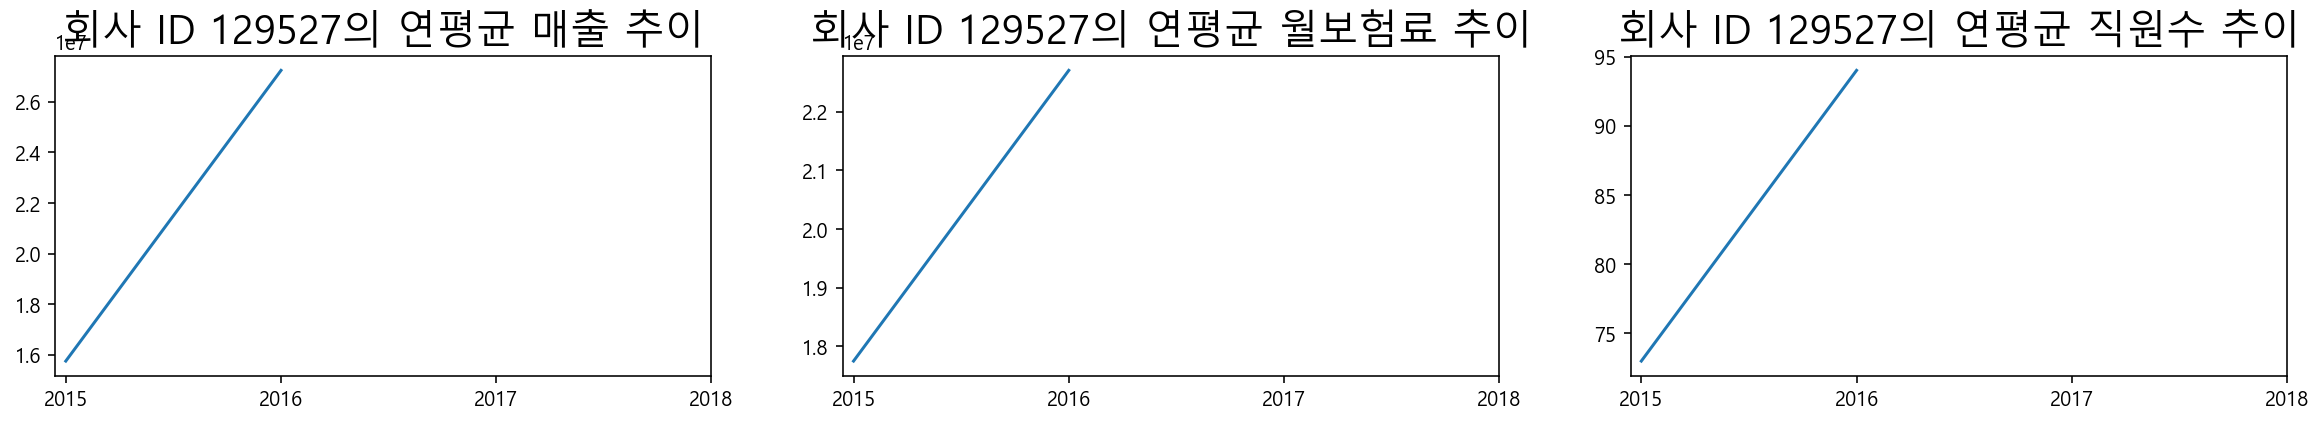

In [87]:
#회사 ID 129527 주요 항목 추이 그래프로 확인
unicorn=df_year_gr[df_year_gr['회사ID']==129527]
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.plot(unicorn['년도'],unicorn['연매출액'])
plt.title("회사 ID 129527의 연평균 매출 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(332)
plt.plot(unicorn['년도'],unicorn['월별_연금보험료'])
plt.title("회사 ID 129527의 연평균 월보험료 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.subplot(333)
plt.plot(unicorn['년도'],unicorn['월별_직원수'])
plt.title("회사 ID 129527의 연평균 직원수 추이", fontsize=20)
plt.xticks([2015,2016,2017,2018])
plt.show()